In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/medellin_clima_2_anios.csv'

data = pd.read_csv(file_path)

print(data.head())

   codigo_x           fecha_hora  h_promedio     h_std   h_sum  t_promedio  \
0       197  2022-06-29 14:45:00   60.322667  0.593506  904.84   24.714667   
1       197  2022-06-29 15:00:00   59.664667  1.366768  894.97   24.759333   
2       197  2022-06-29 15:15:00   59.628000  0.709368  894.42   24.617333   
3       197  2022-06-29 15:30:00   59.266667  0.651050  889.00   24.583333   
4       197  2022-06-29 15:45:00   61.250000  0.883338  918.75   24.980000   

      t_std   t_sum  pr_promedio    pr_std  ...  p_sum  p_min  p_max  \
0  0.105076  370.72   842.491333  0.065232  ...    0.0    0.0    0.0   
1  0.070353  371.39   842.331333  0.040685  ...    0.0    0.0    0.0   
2  0.112787  369.26   842.247333  0.075068  ...    0.0    0.0    0.0   
3  0.106413  368.75   842.081333  0.064128  ...    0.0    0.0    0.0   
4  0.165357  374.70   841.872000  0.065049  ...    0.0    0.0    0.0   

   codigo_mapeado_2  codigo  nivel_metros_promedio  nivel_metros_std  \
0                93      9

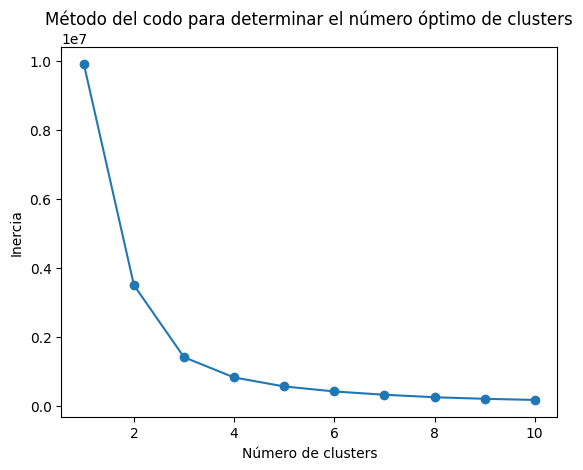

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleccionar la columna de temperatura promedio
X = data[['t_promedio']]

# Calcular la suma de los errores cuadráticos (inercia) para diferentes números de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()


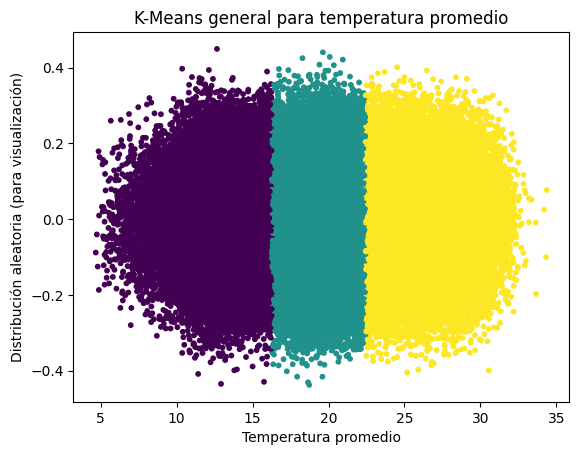

In [ ]:
# Visualización de clusters con dispersión aleatoria en el eje Y
import numpy as np

# Crear un eje Y aleatorio para una mejor visualización
y_random = np.random.normal(0, 0.1, size=len(data))  # Pequeña dispersión en el eje Y

# Graficar los clusters
plt.scatter(data['t_promedio'], y_random, c=data['cluster_general'], cmap='viridis', s=10)
plt.title('K-Means general para temperatura promedio')
plt.xlabel('Temperatura promedio')
plt.ylabel('Distribución aleatoria (para visualización)')
plt.show()


<ipython-input-4-043e8116fe19>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cluster'] = kmeans.fit_predict(X)


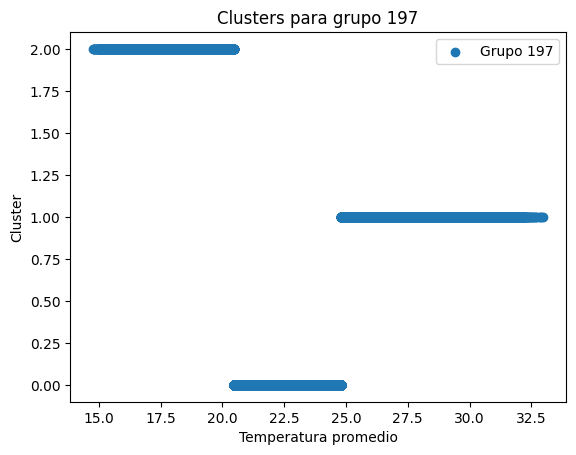

<ipython-input-4-043e8116fe19>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cluster'] = kmeans.fit_predict(X)


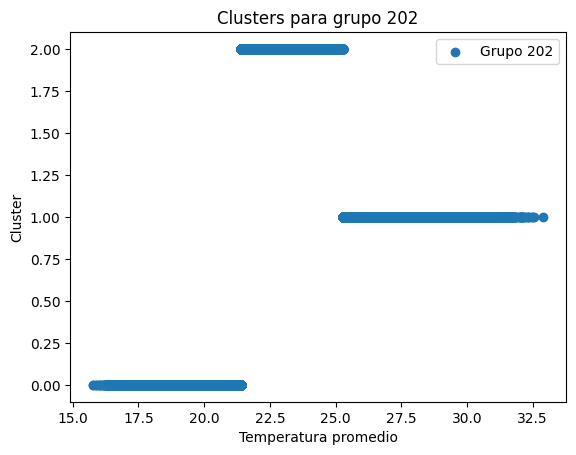

<ipython-input-4-043e8116fe19>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cluster'] = kmeans.fit_predict(X)


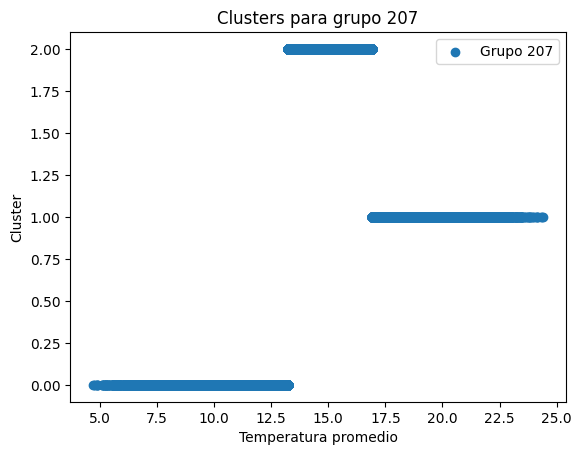

<ipython-input-4-043e8116fe19>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cluster'] = kmeans.fit_predict(X)


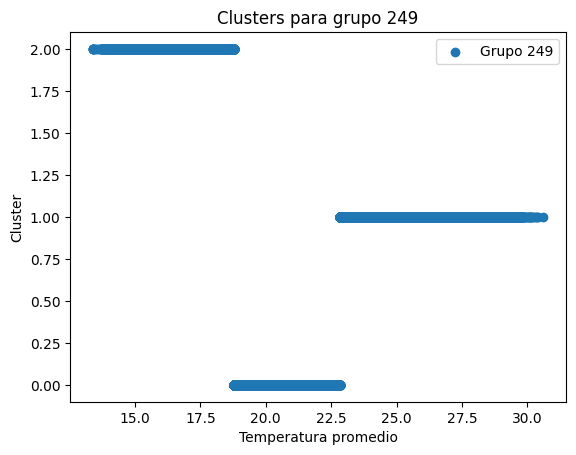

<ipython-input-4-043e8116fe19>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cluster'] = kmeans.fit_predict(X)


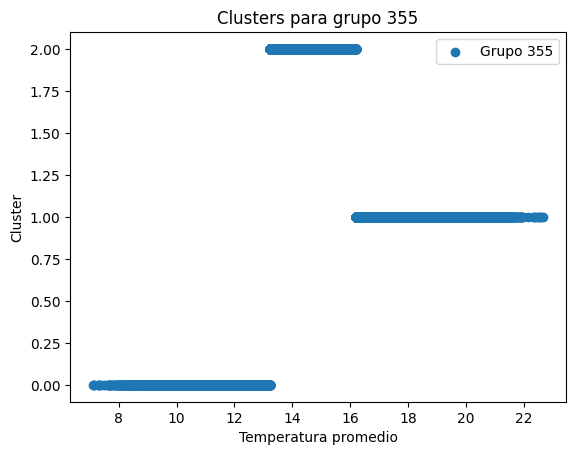

<ipython-input-4-043e8116fe19>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cluster'] = kmeans.fit_predict(X)


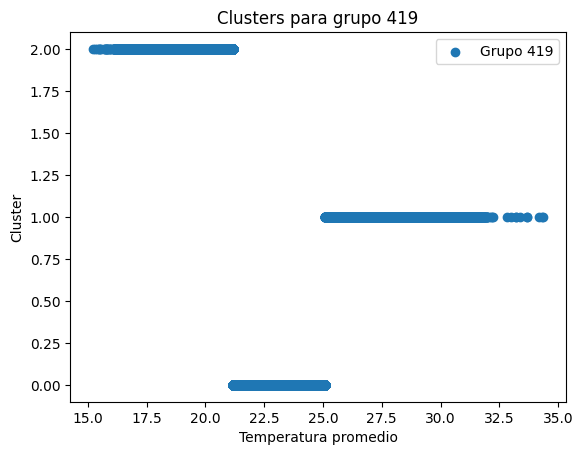

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Obtener los valores únicos de 'codigo_x'
grupos = data['codigo_x'].unique()

# Iterar sobre cada grupo
for grupo in grupos:
    subset = data[data['codigo_x'] == grupo]  # Filtrar el grupo
    X = subset[['t_promedio']]  # Seleccionar la columna de interés

    # Aplicar K-Means (ejemplo con 3 clusters por grupo)
    kmeans = KMeans(n_clusters=3, random_state=42)
    subset['cluster'] = kmeans.fit_predict(X)

    # Visualizar los clusters
    plt.scatter(subset['t_promedio'], subset['cluster'], label=f'Grupo {grupo}')
    plt.xlabel('Temperatura promedio')
    plt.ylabel('Cluster')
    plt.title(f'Clusters para grupo {grupo}')
    plt.legend()
    plt.show()


<ipython-input-6-293312fa10d9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='codigo_x', y='max_temp', data=comparacion_df, palette='coolwarm')


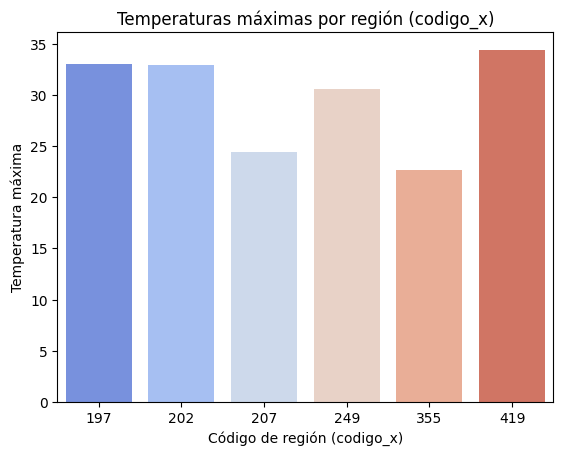

<ipython-input-6-293312fa10d9>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='codigo_x', y='avg_temp', data=comparacion_df, palette='viridis')


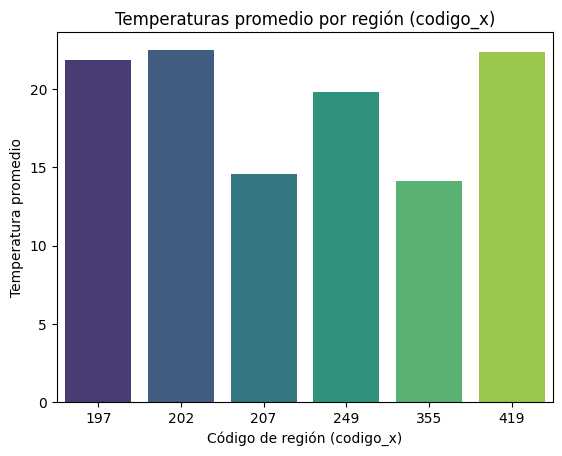

<ipython-input-6-293312fa10d9>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='codigo_x', y='min_temp', data=comparacion_df, palette='Blues')


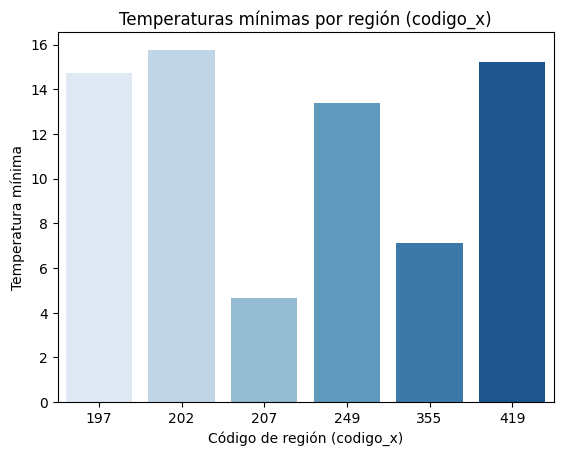

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame para almacenar la comparación
comparacion = []

# Iterar por cada grupo (región)
for grupo in grupos:
    subset = data[data['codigo_x'] == grupo]
    max_temp = subset['t_promedio'].max()  # Máxima temperatura
    avg_temp = subset['t_promedio'].mean()  # Promedio de temperatura
    min_temp = subset['t_promedio'].min()  # Mínima temperatura
    comparacion.append({'codigo_x': grupo, 'max_temp': max_temp, 'avg_temp': avg_temp, 'min_temp': min_temp})

# Convertir a DataFrame
comparacion_df = pd.DataFrame(comparacion)

# Graficar la comparación de temperaturas máximas
sns.barplot(x='codigo_x', y='max_temp', data=comparacion_df, palette='coolwarm')
plt.title('Temperaturas máximas por región (codigo_x)')
plt.xlabel('Código de región (codigo_x)')
plt.ylabel('Temperatura máxima')
plt.show()

# Graficar la comparación de temperaturas promedio
sns.barplot(x='codigo_x', y='avg_temp', data=comparacion_df, palette='viridis')
plt.title('Temperaturas promedio por región (codigo_x)')
plt.xlabel('Código de región (codigo_x)')
plt.ylabel('Temperatura promedio')
plt.show()

# Graficar la comparación de temperaturas mínimas
sns.barplot(x='codigo_x', y='min_temp', data=comparacion_df, palette='Blues')
plt.title('Temperaturas mínimas por región (codigo_x)')
plt.xlabel('Código de región (codigo_x)')
plt.ylabel('Temperatura mínima')
plt.show()


In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Usamos MiniBatchKMeans para mejorar la eficiencia
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
minibatch_kmeans_labels = minibatch_kmeans.fit_predict(data[['t_promedio']])

# Calcular el Silhouette Score
minibatch_silhouette = silhouette_score(data[['t_promedio']], minibatch_kmeans_labels)

print(f"Silhouette Score MiniBatch K-Means: {minibatch_silhouette}")



Silhouette Score MiniBatch K-Means: 0.5896789192851108
